In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
#Importing the dataset
data=pd.read_csv('21. naukri.csv')
data.head(3)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              21996 non-null  object 
 1   education            20004 non-null  object 
 2   experience           21996 non-null  object 
 3   industry             21995 non-null  object 
 4   jobdescription       21996 non-null  object 
 5   jobid                22000 non-null  int64  
 6   joblocation_address  21499 non-null  object 
 7   jobtitle             22000 non-null  object 
 8   numberofpositions    4464 non-null   float64
 9   payrate              21903 non-null  object 
 10  postdate             21977 non-null  object 
 11  site_name            3987 non-null   object 
 12  skills               21472 non-null  object 
 13  uniq_id              22000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.3+ MB


In [5]:
# There are 14 columns in dataset. Some of them dont have meaningful information, so we are gonna delete these columns
drop=['jobdescription','jobid','site_name','uniq_id','jobtitle','postdate']
data=data.drop(columns=drop)
data.head()

,company,education,experience,industry,joblocation_address,numberofpositions,payrate,skills
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Chennai,NaN,"1,50,000 - 2,25,000 P.A",ITES
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Chennai,60.0,"1,50,000 - 2,50,000 P.A. 20000",Marketing
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Bengaluru,NaN,Not Disclosed by Recruiter,IT Software - Application Programming
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",NaN,Not Disclosed by Recruiter,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Bengaluru,4.0,Not Disclosed by Recruiter,IT Software - Application Programming


## Cleaning and Analysing Column Experience ##

In [6]:
data.experience.isnull().sum()

4

In [7]:
data.experience.value_counts()[:20]

2 - 7 yrs      1712
2 - 5 yrs      1231
3 - 8 yrs      1192
3 - 5 yrs      1181
5 - 10 yrs     1084
1 - 3 yrs       755
2 - 4 yrs       729
4 - 9 yrs       715
0 - 5 yrs       654
3 - 6 yrs       613
1 - 6 yrs       591
0 - 3 yrs       556
10 - 15 yrs     517
0 - 1 yrs       509
5 - 8 yrs       499
1 - 5 yrs       498
0 - 2 yrs       481
1 - 2 yrs       477
6 - 11 yrs      469
2 - 3 yrs       454
Name: experience, dtype: int64

In [8]:
# There are 4 missing values in column experience, I will fill the missing value with the mode of this column
data.experience.fillna("2 - 7 yrs",inplace=True)

In [9]:
# Here I split the data before extracting the minimum and maximum year experience
year_experience=data.experience.str.split(' ')
data['min_year_exp']=year_experience.apply(lambda x:x[0])
data['max_year_exp']=year_experience.apply(lambda x:x[2] if len(x)>2 else x[0])

In [10]:
data['min_year_exp'].value_counts()

2      4534
3      3497
1      2733
0      2603
5      2174
4      1995
6      1030
10      991
8       830
7       698
12      214
9       206
15      201
Not     111
11       48
13       41
14       41
20       19
18       15
16       11
17        5
25        1
26        1
23        1
Name: min_year_exp, dtype: int64

In [11]:
# The are some rows with value "Not" that need to be replaced
# But before cleaning the data, I want to see what word 'Not' means, so I will go back to columns experience and see the whole row with value "Not"
dirty_list=[]
for i in range(len(data)):
    if ('Not' in data.experience[i]):
        dirty_list.append(data.experience[i])
dirty_list

['Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Ment

In [12]:
# Because its not mentioned, so I am going to replace 'Not' with '2'
data['min_year_exp']=np.where(data.min_year_exp=='Not','2',data.min_year_exp)
data['min_year_exp'].value_counts()

2     4645
3     3497
1     2733
0     2603
5     2174
4     1995
6     1030
10     991
8      830
7      698
12     214
9      206
15     201
11      48
13      41
14      41
20      19
18      15
16      11
17       5
23       1
25       1
26       1
Name: min_year_exp, dtype: int64

In [13]:
# We are going to do the same with column max_year_exp
data['max_year_exp'].value_counts()

5      3720
7      2732
8      2332
6      2110
10     1823
3      1768
4      1547
9      1039
2       962
12      702
15      616
11      581
1       517
13      420
20      291
0       173
14      164
Not     111
18      104
16       72
17       68
25       50
22       36
19       20
23       13
24        9
21        7
30        6
28        4
27        1
26        1
-1        1
Name: max_year_exp, dtype: int64

In [14]:
# There are rows with value 'Not' and '-1'. I will replace value 'Not' with '7' and value '-1' with 1
data['max_year_exp']=np.where(data.max_year_exp=='Not','7',data.max_year_exp)
data['max_year_exp']=np.where(data.max_year_exp=='-1','1',data.max_year_exp)
data['max_year_exp'].value_counts()

5     3720
7     2843
8     2332
6     2110
10    1823
3     1768
4     1547
9     1039
2      962
12     702
15     616
11     581
1      518
13     420
20     291
0      173
14     164
18     104
16      72
17      68
25      50
22      36
19      20
23      13
24       9
21       7
30       6
28       4
27       1
26       1
Name: max_year_exp, dtype: int64

In [15]:
# Now lets change string in column min_year_exp and max_year_exp into integer
data['min_year_exp']=data['min_year_exp'].astype(int)
data['max_year_exp']=data['max_year_exp'].astype(int)

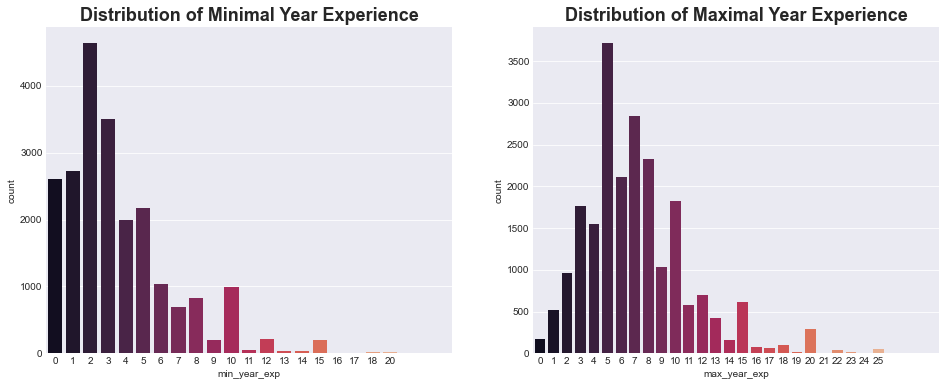

In [16]:
# After cleaning column min_year_exp and max_year_exp, I am going to see the distribution in both columns
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data.min_year_exp,palette='rocket')
plt.xticks(range(0,20))
plt.title("Distribution of Minimal Year Experience",weight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data.max_year_exp,palette='rocket')
plt.xticks(range(0,26))
plt.title("Distribution of Maximal Year Experience",weight='bold',size=18)
plt.show()

From the distribution above, we see that the most common minimal year experience required for job vacancies is 2 years experience, where the most common maximal year experience required is 5 years experience

## Cleaning and Analysing Column Education ##

In [17]:
data.education.unique()[:5]

array(['UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required',
       'UG: B.Tech/B.E. - Any Specialization PG:MBA/PGDM - Any Specialization',
       'UG: Any Graduate - Any Specialization PG:Any Postgraduate Doctorate:Doctorate Not Required',
       'UG: Any Graduate - Any Specialization PG:CA Doctorate:Doctorate Not Required',
       'UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, MCA - Computers, M.Tech - Any Specialization Doctorate:Any Doctorate - Any Specialization'],
      dtype=object)

In [18]:
#Check the number of null values in column education
data.education.isnull().sum()

1996

In [19]:
#I will replace null values with "'UG: Any Graduate - Any Specialization'"
data.education.fillna('UG: Any Graduate - Any Specialization',inplace=True)

In [20]:
# Here I want to know the most needed Bachelor Degrees by companies
# First, replace "PG" and "Doctorate" with delimiter "|" so I can split the value with delimiter. 
# Then I extract the first value in the list which is Bachelor Degree required for the job
data_edu=data.education.apply(lambda x:x.replace(" PG:","|")).apply(lambda x:x.replace(" Doctorate:","|"))

In [21]:
data_edu=data_edu.apply(lambda x:x.split("|"))

In [22]:
data_edu=data_edu.apply(lambda x:x[0])

In [23]:
data_edu.value_counts()[:10]

UG: Any Graduate - Any Specialization                             6962
UG: Any Graduate                                                  4055
UG: B.Tech/B.E.                                                   4032
UG: Any Graduate - Any Specialization, Graduation Not Required    2205
UG: B.Tech/B.E. - Any Specialization                               753
UG: B.Tech/B.E. - Computers                                        397
UG: B.Com                                                          240
UG: Diploma                                                        163
UG: B.B.A                                                          149
UG: B.Com - Commerce                                               148
Name: education, dtype: int64

In [24]:
# From the data extracted above, we see that some data has the same meaning but has different name
#so I am going to replace it with the same name
data_edu=data_edu.apply(lambda x:x.replace("UG: Any Graduate - Any Specialization","UG: Any Graduate"))
data_edu=data_edu.apply(lambda x:x.replace("UG: Any Graduate - Any Specialization, Graduation Not Required","UG: Any Graduate"))
data_edu=data_edu.apply(lambda x:x.replace("UG: Any Graduate, Graduation Not Required","UG: Any Graduate"))
data_edu=data_edu.apply(lambda x:x.replace("B.Tech/B.E. - Any Specialization","UG: B.Tech/B.E."))
data_edu=data_edu.apply(lambda x:x.replace("UG: UG: B.Tech/B.E.","UG: B.Tech/B.E."))
data_edu=data_edu.apply(lambda x:x.replace("UG: Graduation Not Required","UG: Any Graduate"))
data_edu=data_edu.apply(lambda x:x.replace("UG: Any Graduate, UG: B.Tech/B.E.","UG: B.Tech/B.E."))
data_edu=data_edu.apply(lambda x:x.replace("UG: B.Tech/B.E., Computers","UG: B.Tech/B.E. - Computers"))
data_edu=data_edu.apply(lambda x:x.replace("UG: B.Tech/B.E., Computers","UG: B.Tech/B.E. - Computers"))
data_edu=data_edu.apply(lambda x:x.replace("UG: B.Com - Commerce","UG: B.Com"))
data_edu=data_edu.apply(lambda x:x.replace("UG: ",""))

In [25]:
data["degree"]=data_edu
top_10_degree=pd.DataFrame(data.degree.value_counts()[:10])
top_10_degree

,degree
Any Graduate,13354
B.Tech/B.E.,4947
B.Tech/B.E. - Computers,483
B.Com,388
Diploma,163
B.B.A,149
B.Sc,110
B.A,96
BCA,82
B.Ed,62


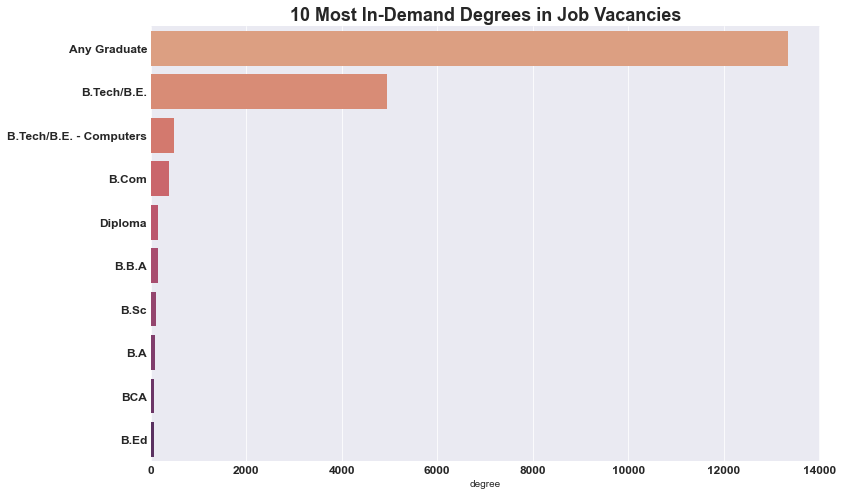

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(y=top_10_degree.index,x=top_10_degree.degree,palette='flare')
plt.title("10 Most In-Demand Degrees in Job Vacancies",weight='bold',size=18)
plt.xticks(size=12,weight='bold')
plt.yticks(size=12,weight='bold')
plt.show()

From the chart above, we see that most jobs available require degree in any graduate/spesialization. These jobs may not need specific spesialization so they are open to any degree. While for jobs with specific spesialization, most needed bachelor degrees are Bachelor of Technology, Bachelor of Engineering, and Bachelor of Commerce.

## Cleaning and Analysing Column Industry ##

In [27]:
# Check the number of null values in column industy
data.industry.isnull().sum()

5

In [28]:
data[data.industry.isnull()]

,company,education,experience,industry,joblocation_address,numberofpositions,payrate,skills,min_year_exp,max_year_exp,degree
3768,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
4026,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
4389,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
4841,NaN,UG: Any Graduate - Any Specialization,2 - 7 yrs,NaN,NaN,NaN,NaN,NaN,2,7,Any Graduate
18578,RBS India Development Centre (P) Ltd.,UG: Any Graduate - Any Specialization,2 - 5 yrs,NaN,"Gurgaon , haryana",NaN,NaN,NaN,2,5,Any Graduate


In [29]:
# We will fill the nan values in column industry with the mode
data.industry.fillna(data.industry.mode()[0],inplace=True)
data.industry.isnull().sum()

0

In [30]:
# Here we are going to display the 15 most popular industries in Job Vacancies
display(pd.DataFrame(data.industry.value_counts()[:15]).style.background_gradient(cmap="Greys"))

,industry
IT-Software / Software Services,9221
Education / Teaching / Training,1322
BPO / Call Centre / ITES,1254
Banking / Financial Services / Broking,1238
Recruitment / Staffing,1129
Internet / Ecommerce,738
Pharma / Biotech / Clinical Research,525
Medical / Healthcare / Hospitals,495
Automobile / Auto Anciliary / Auto Components,478
Construction / Engineering / Cement / Metals,449


With more than 9000 jobs available, we can see how popular indusrty in Technology is. The number is significantly higher than any other industries, which atmost only reach 1322. The second most popular industry is Education / Teaching / Training and followed by BPO / Call Centre / ITES.

## Cleaning and Analysing Column Job Address ##

In [31]:
data.joblocation_address.head()

0                                              Chennai
1                                              Chennai
2                                            Bengaluru
3    Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...
4                                            Bengaluru
Name: joblocation_address, dtype: object

In [32]:
data.joblocation_address.value_counts()[:5]

Bengaluru/Bangalore         3775
Mumbai                      2348
Bengaluru                   1453
Hyderabad / Secunderabad    1246
Chennai                     1204
Name: joblocation_address, dtype: int64

In [33]:
data.joblocation_address.isnull().sum()

501

In [34]:
# I am going to fill the nan values with "Not Mentioned". 
# The reason why I dont replace it with mode is because the number of null values is pretty high and it can be diverse
# I dont want this to affet the point of our analysis
data.joblocation_address.fillna('Not Mentioned',inplace=True)

In [35]:
# There are some addresses that have the same meaning but different name, "Bengalore" and "Bengaluru" 
# So we are going to fix it
data['loc']=data.joblocation_address
data['loc']=data['loc'].apply(lambda x:x.replace("Bengaluru/Bangalore","Bengaluru"))
data['loc']=data['loc'].apply(lambda x:x.replace("Bangalore","Bengaluru"))
data['loc']=data['loc'].apply(lambda x:x.replace("Bengaluru/Bangalore , Bengaluru / Bangalore","Bengaluru"))
data['loc']=data['loc'].apply(lambda x:x.replace("Mumbai , Mumbai","Mumbai"))
data['loc']=data['loc'].apply(lambda x:x.replace("Delhi , Delhi","Delhi"))
data['loc']=data['loc'].apply(lambda x:x.replace("Delhi/NCR(National Capital Region)","Delhi"))
data['loc']=data['loc'].apply(lambda x:x.replace("Delhi/NCR(National Capital Region)","Delhi"))
data['loc']=data['loc'].apply(lambda x:x.replace("Noida , Noida/Greater Noida","Noida"))
data['loc']=data['loc'].apply(lambda x:x.replace("Gurgaon , Gurgaon","Gurgaon"))
data['loc']=data['loc'].apply(lambda x:x.replace("Bengaluru , Bengaluru / Bangalore","Bengaluru"))
data['loc']=data['loc'].apply(lambda x:x.replace("Hyderabad / Secunderabad , Hyderabad/Secunderabad","Hyderabad / Secunderabad"))
data['loc']=data['loc'].apply(lambda x:x.replace("Hyderabad / Secunderabad","Hyderabad"))
data['loc']=data['loc'].apply(lambda x:x.replace("Delhi NCR","Delhi"))
data['loc']=data['loc'].apply(lambda x:x.replace("Bengaluru / Bangalore","Bengaluru"))
data['loc']=data['loc'].apply(lambda x:x.replace("Delhi/NCR","Delhi"))
data['loc']=data['loc'].apply(lambda x:x.replace("Greater Noida","Noida"))
data['loc']=data['loc'].apply(lambda x:x.replace("Greater Noida","Noida"))
data['loc']=data['loc'].apply(lambda x:x.replace('Noida/Noida',"Noida"))
data['loc']=data['loc'].apply(lambda x:x.replace("mumbai","Mumbai"))
data['loc']=data['loc'].apply(lambda x:x.replace("Hyderabad/Secunderabad","Hyderabad"))
data['loc']=data['loc'].apply(lambda x:x.replace("Bengaluru / Bengaluru","Bengaluru"))

In [36]:
# We see that there are some jobs that available in more than 1 location
# So before doing visualization, we we want to split the value in this column 
address=[]
data['loc']=data['loc'].apply(lambda x:x.replace(" , ",", "))
data['loc']=data['loc'].apply(lambda x:x.split(", "))
data['loc']

0                                                [Chennai]
1                                                [Chennai]
2                                              [Bengaluru]
3        [Mumbai, Bengaluru, Kolkata, Chennai, Coimbato...
4                                              [Bengaluru]
                               ...                        
21995                                          [Bengaluru]
21996                                 [Bengaluru, Gurgaon]
21997                                          [Bengaluru]
21998                                   [Delhi, Bengaluru]
21999                                          [Bengaluru]
Name: loc, Length: 22000, dtype: object

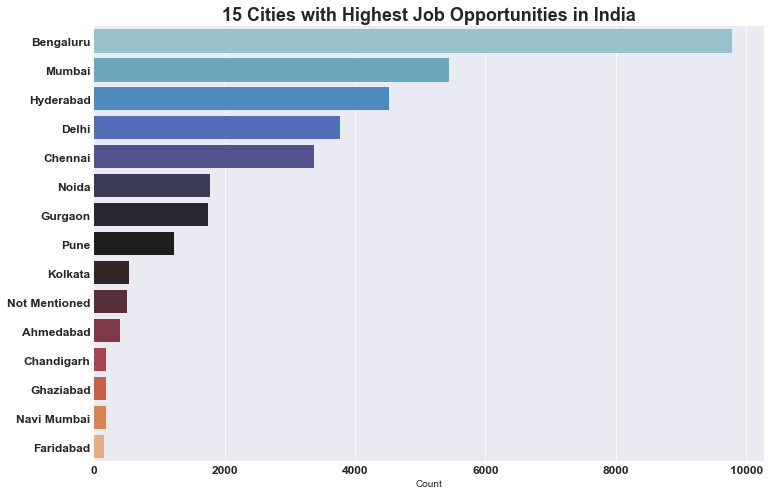

In [37]:
# Next we are going to extract each location in each row with function explode
x=data['loc'].explode()
top_15_location=pd.DataFrame(x.value_counts()[:15])
top_15_location.columns=["Count"]

plt.figure(figsize=(12,8))
sns.barplot(y=top_15_location.index,x=top_15_location.Count,palette="icefire")
plt.title("15 Cities with Highest Job Opportunities in India",weight='bold', size=18)
plt.xticks(size=12,weight='bold')
plt.yticks(size=12,weight='bold')
plt.show()

From the result above, we see that Bengaluru is the city with highest job opportunites in India, followed by Mumbai, Hyderabad, and Delhi. The result is not surprising considering those cities are the most populated cities in India.

## Cleaning and Analysing Column Number of Positions ##

In [38]:
data.numberofpositions.value_counts()

1.0      1108
2.0       777
5.0       378
10.0      375
3.0       325
         ... 
78.0        1
41.0        1
125.0       1
126.0       1
23.0        1
Name: numberofpositions, Length: 84, dtype: int64

In [39]:
# Check the number of null values
data.numberofpositions.isnull().sum()

17536

In [40]:
# It appears that there are so many null values in this columns. This may be because only 1 job available for the position. 
# So we are going to fill null values with 1

data.numberofpositions.fillna(1,inplace=True)
data.numberofpositions=data.numberofpositions.astype(int)
data.numberofpositions

0         1
1        60
2         1
3         1
4         4
         ..
21995     2
21996     1
21997     1
21998     1
21999     1
Name: numberofpositions, Length: 22000, dtype: int32

In [41]:
number_of_position=pd.DataFrame(data.numberofpositions)
number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>=10) & (number_of_position.numberofpositions<50),49,number_of_position.numberofpositions)# Here I am temporary replace value in range [10,49] with 49, later I will replace it with "[10,49]"
number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>=50) & (number_of_position.numberofpositions<100),99,number_of_position.numberofpositions)# Here I am temporary replace value in range [50,99] with 99, later I will replace it with "[50,99]"
number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>=100) & (number_of_position.numberofpositions<1000),101,number_of_position.numberofpositions) # Here I am temporary replace value in range [100,999] with 101, later I will replace it with "[100-999]"
number_of_position.numberofpositions=np.where((number_of_position.numberofpositions>1000) | (number_of_position.numberofpositions==1000),1000,number_of_position.numberofpositions)# Here I am temporary replace value >=1000 with 1000, later I will replace it with "[1000,]"
number_of_position.numberofpositions=number_of_position.numberofpositions.astype(int)
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:str(x).replace("49","[10,49]"))
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:x.replace("99","[50,99]"))
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:x.replace("101","[100,999]"))
number_of_position.numberofpositions=number_of_position.numberofpositions.apply(lambda x:x.replace("1000","[1000,]"))

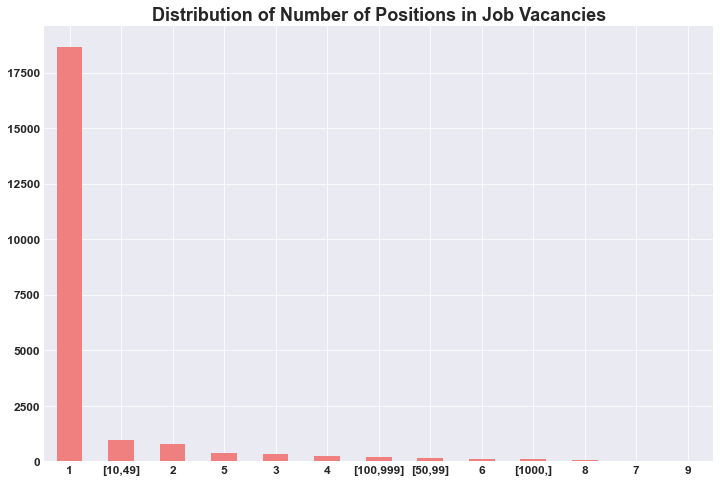

In [42]:
plt.figure(figsize=(12,8))
number_of_position.numberofpositions.value_counts().plot(kind='bar',color='lightcoral')
plt.xticks(rotation=360,size=12,weight='bold')
plt.yticks(size=12,weight='bold')
plt.title("Distribution of Number of Positions in Job Vacancies",size=18,weight='bold')
plt.show()

From the graph above, we see that the majority of job vacancies only open for 1 position. But there is uncertainty about this number because we fiiled over than 17500 missing values with 1.

## Cleaning and Analysing Column Skills ##

In [43]:
data.skills.value_counts()[:10]

IT Software - Application Programming    5989
Sales                                    2893
ITES                                     1640
Teaching                                 1091
HR                                        928
Marketing                                 868
Accounts                                  860
Production                                667
Medical                                   418
Financial Services                        413
Name: skills, dtype: int64

In [44]:
data.skills.isnull().sum()

528

In [45]:
# Let see the data that have missing value in columns skills
data[data.skills.isnull()][:10]

,company,education,experience,industry,joblocation_address,numberofpositions,payrate,skills,min_year_exp,max_year_exp,degree,loc
68,Manipal-City & Guilds (MCG),UG: Any Graduate PG:Post Graduation Not Requir...,2 - 5 yrs,Education / Teaching / Training,Bengaluru,1,Not Disclosed by Recruiter,NaN,2,5,Any Graduate,[Bengaluru]
128,Delight HR Services Pvt Ltd.,UG: Any Graduate - Any Specialization PG:Post ...,2 - 5 yrs,Other,Bengaluru,1,"2,50,000 - 3,50,000 P.A",NaN,2,5,Any Graduate,[Bengaluru]
176,Synophic Systems Inc,"UG: B.Tech/B.E. - Any Specialization, B.Sc - A...",7 - 12 yrs,Telecom/ISP,Bengaluru,1,"6,50,000 - 13,00,000 P.A. Negotiable",NaN,7,12,"B.Tech/B.E., B.Sc - Any Specialization, BCA - ...",[Bengaluru]
182,Crystal Hiring Pvt. Ltd.,UG: Any Graduate - Any Specialization,7 - 12 yrs,IT-Software / Software Services,"Mumbai, Bengaluru",1,"6,00,000 - 12,00,000 P.A",NaN,7,12,Any Graduate,"[Mumbai, Bengaluru]"
206,Amogh Software Solutions Pvt Ltd hiring for Le...,UG: Any Graduate - Any Specialization,3 - 7 yrs,Banking / Financial Services / Broking,Bengaluru,1,Not Disclosed by Recruiter,NaN,3,7,Any Graduate,[Bengaluru]
228,Confident Group,UG: Any Graduate - Any Specialization,0 - 5 yrs,Real Estate / Property,Bengaluru,2,Not Disclosed by Recruiter,NaN,0,5,Any Graduate,[Bengaluru]
303,Ashish Interbuild Pvt. Ltd.,"UG: B.Tech/B.E. - Any Specialization, Civil, D...",4 - 8 yrs,Architecture / Interior Design,"Mumbai, Bengaluru, Hyderabad",10,"4,00,000 - 6,00,000 P.A. Depends on Experience",NaN,4,8,"B.Tech/B.E., Civil, Diploma - Any Specializati...","[Mumbai, Bengaluru, Hyderabad]"
376,Frankfinn Institute of Air Hostess Training,UG: Any Graduate - Any Specialization,2 - 5 yrs,Education / Teaching / Training,"Bengaluru, Delhi",1,"2,00,000 - 3,00,000 P.A",NaN,2,5,Any Graduate,"[Bengaluru, Delhi]"
422,Global Career Academy hiring for Office assistant,"UG: Any Graduate - Any Specialization, Diploma...",0 - 5 yrs,Education / Teaching / Training,Bengaluru,3,"1,25,000 - 1,75,000 P.A",NaN,0,5,"Any Graduate, Diploma - Any Specialization",[Bengaluru]
471,Synophic Systems Inc,"UG: B.Tech/B.E. - Any Specialization, BCA - Co...",4 - 7 yrs,Telecom/ISP,Bengaluru,1,"3,00,000 - 6,50,000 P.A. Negotiable",NaN,4,7,"B.Tech/B.E., BCA - Computers, B.Sc - Any Speci...",[Bengaluru]


In [46]:
# Lets take a look on column industry in the data above. We see that the industry is pretty diverse.
# So, instead of filling the missing value with the mode of the entire data, I am going to impute skills with the mode of skills of related industry
mode_skills=[]
for industry in data.industry.unique():
    mode=data[data['industry']==industry][['skills','company']].groupby(['skills']).count().sort_values(by='company',ascending=False).index[0]
    mode_skills.append(mode)

In [47]:
zip_iterator=zip(data.industry.unique().tolist(),mode_skills)
dict_ind_skills=dict(zip_iterator)
dict_ind_skills

{'Media / Entertainment / Internet': 'Sales',
 'Advertising / PR / MR / Event Management': 'Marketing',
 'IT-Software / Software Services': 'IT Software - Application Programming',
 'Banking / Financial Services / Broking': 'Sales',
 'Aviation / Aerospace Firms': 'Production',
 'Industrial Products / Heavy Machinery': 'Sales',
 'FMCG / Foods / Beverage': 'Sales',
 'Recruitment / Staffing': 'HR',
 'Internet / Ecommerce': 'IT Software - Application Programming',
 'Travel / Hotels / Restaurants / Airlines / Railways': 'Hotels',
 'BPO / Call Centre / ITES': 'ITES',
 'Pharma / Biotech / Clinical Research': 'Production',
 'Real Estate / Property': 'Sales',
 'Insurance': 'Sales',
 'Facility Management': 'Sales',
 'Publishing': 'Sales',
 'Education / Teaching / Training': 'Teaching',
 'Retail / Wholesale': 'Sales',
 'Automobile / Auto Anciliary / Auto Components': 'Production',
 'Chemicals / PetroChemical / Plastic / Rubber': 'Sales',
 'Government / Defence': 'Engineering Design',
 'Accounting

In [48]:
# Now we get the dictionary that consist of industry and the most needed skills for the industry
for i in range(len(data)):
    if pd.isnull(data.skills[i]):
        data.skills[i]=dict_ind_skills[data.industry[i]]


In [49]:
data.skills.isnull().sum()

0

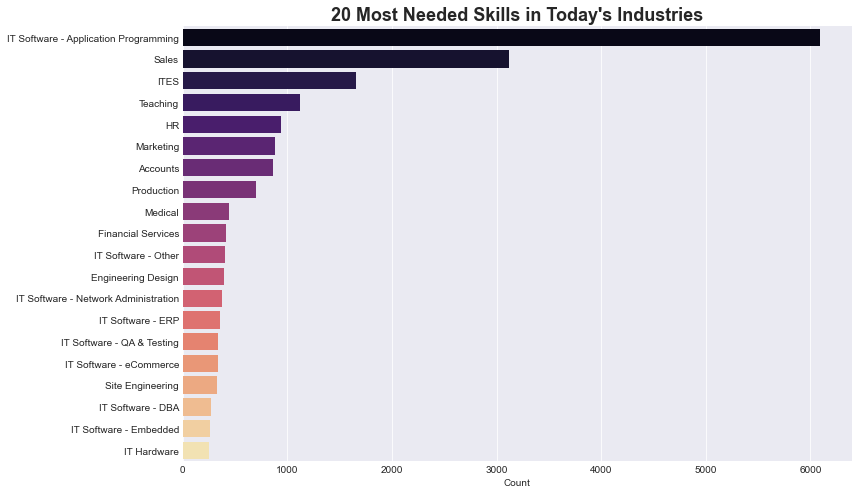

In [50]:
# Now we successfully impute the data, we are going to fetch the 20 most needed skills 
top_20_skills=pd.DataFrame(data['skills'].value_counts()[:20])
top_20_skills.columns=['Count']
plt.figure(figsize=(12,8))
sns.barplot(y=top_20_skills.index,x=top_20_skills.Count,palette='magma')
plt.title("20 Most Needed Skills in Today's Industries",weight='bold',size=18)
plt.show()

From the chart above, we see that IT Software - Application Programming, Sales and ITES are the most needed skills in today's industry

## Cleaning and Analysing Column Payrate ##

In [51]:
data.payrate[:10]

0           1,50,000 - 2,25,000 P.A
1    1,50,000 - 2,50,000 P.A. 20000
2        Not Disclosed by Recruiter
3        Not Disclosed by Recruiter
4        Not Disclosed by Recruiter
5        Not Disclosed by Recruiter
6           3,00,000 - 6,50,000 P.A
7        Not Disclosed by Recruiter
8           1,00,000 - 2,00,000 P.A
9        Not Disclosed by Recruiter
Name: payrate, dtype: object

In [52]:
data.payrate.isnull().sum()

97

In [53]:
# For now, we wil fill nan value with " Not Disclosed by Recruiter"
data.payrate.fillna("Not Disclosed by Recruiter",inplace=True)
data.payrate.value_counts()

Not Disclosed by Recruiter                                                                                                                                                       15946
Pay Band: PB4 (Rs.3740067000) with Academic Grade Pay of Rs.10,500/p.m.                                                                                                            121
Pay Band: PB4 (Rs.3740067000) with Academic Grade Pay of Rs.9,500/p.m.                                                                                                             116
Best in the Industry                                                                                                                                                                87
Pay Band: PB3 (Rs.15600-39100) with Academic Grade Pay of Rs.8,000/p. m.                                                                                                            84
                                                                                     

In [54]:
# We see that majority of job vacancies dont display the payrate for job position, let see the percentage
print("The percentage of job vacancies with not pay rate information is:",data.payrate.value_counts()[0]/len(data.payrate))

The percentage of job vacancies with not pay rate information is: 0.7248181818181818


In [55]:
# The percentage is really high, so we wont do further analysis in this column

## Cleaning and Analysing Column Company ##

In [56]:
data.company.value_counts()[:10]

Indian Institute of Technology Bombay           403
Confidential                                    393
National Institute of Industrial Engineering    185
Oracle India Pvt. Ltd.                          151
JPMorgan Chase                                  135
Godrej Industries Ltd                           125
Unitforce technologies Pvt. Ltd.                100
Capgemini                                        98
HCL Technologies                                 95
Axis Jobs                                        92
Name: company, dtype: int64

In [57]:
data.company.isnull().sum()

4

In [58]:
# We are going to impute missing value with "Confidential"
data.company.fillna("Confidential",inplace=True)
data.company.isnull().sum()

0

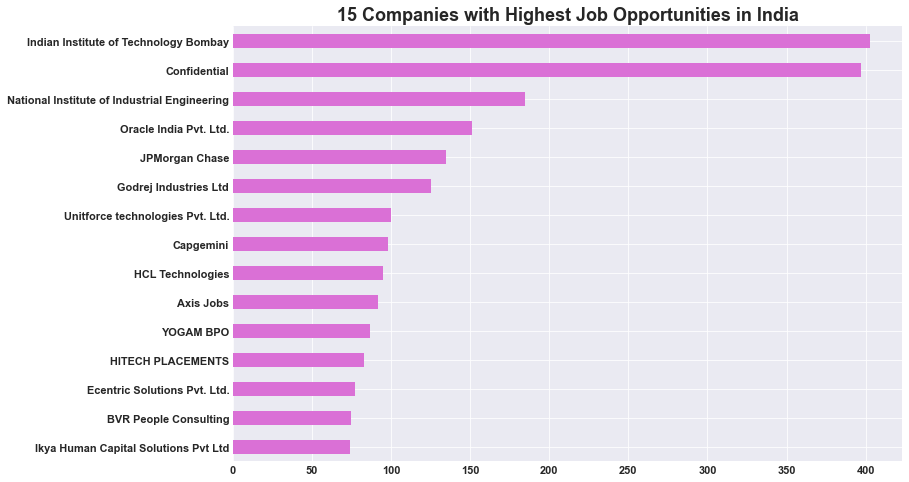

In [59]:
plt.figure(figsize=(12,8))
data.company.value_counts()[:15].sort_values().plot(kind='barh',color='orchid')
plt.title("15 Companies with Highest Job Opportunities in India",size=18,weight='bold')
plt.xticks(size=11,weight='bold')
plt.yticks(size=11,weight='bold')
plt.show()

Now we get 15 companies with highest job opportunities in India, three of them are Indian Institute of Technology Bombay, National Institute of Industrial Engineering, and Oracle India Pvt. Ltd.

## Most Needed Skill for Particular Industry ##

In [60]:
# This section will help jop applicant to prepare their skills if they want to pursue career in specifit industry
mode_skills=[]
for industry in data.industry.unique():
    mode=data[data['industry']==industry][['skills','company']].groupby(['skills']).count().sort_values(by='company',ascending=False).index[0]
    mode_skills.append(mode)

In [61]:
pd.set_option('max_rows',100)
pd.DataFrame(mode_skills,data.industry.unique().tolist(),columns=["Most Needed Skill"])[:63]

,Most Needed Skill
Media / Entertainment / Internet,Sales
Advertising / PR / MR / Event Management,Marketing
IT-Software / Software Services,IT Software - Application Programming
Banking / Financial Services / Broking,Sales
Aviation / Aerospace Firms,Production
Industrial Products / Heavy Machinery,Sales
FMCG / Foods / Beverage,Sales
Recruitment / Staffing,HR
Internet / Ecommerce,IT Software - Application Programming
Travel / Hotels / Restaurants / Airlines / Railways,Hotels


## Average Minimal Year Experience and Maximal Year Experience for Each Industry ##

In [62]:
# This information can give insight for jobseeker to find a job that match their year experience
pd.set_option('max_rows',70)
display(data[['industry','min_year_exp','max_year_exp']].groupby(['industry']).mean().sort_values(by='min_year_exp').style.background_gradient(cmap='coolwarm'))

,min_year_exp,max_year_exp
industry,,
Fresher / Trainee / Entry Level,0.055556,2.222222
Wellness / Fitness / Sports / Beauty,1.000000,4.250000
Leather,1.000000,3.000000
BPO / Call Centre / ITES,1.731260,5.175439
Government / Defence,2.315789,6.894737
Publishing,2.386364,5.636364
Wellness / Fitness / Sports,2.400000,5.066667
Travel / Hotels / Restaurants / Airlines / Railways,2.428184,5.769648
Advertising / PR / MR / Event Management,2.454183,5.709163


From the result above, we find some industries that require relatively short year experience, such as Fresher/Trainee/Entry Level, Wellness/Fitness/Sports/ Beauty, and Leather. We also find some industries that require many years of experience, such as Tyres, Pulp and Paper, and Medical Devices / Equipments.

## Job Reccomendation ##

In [63]:
# In this section, I want to make an interactive funtion to find jobs based on some criterias
# such as year experiece, degree, skill, and location

In [64]:
@interact
def job_reccomendation(min_exp=range(0,25),max_exp=range(0,27),degree=list(data.degree.unique()),skills=data.skills.unique(),loc=list(x.unique())):
    bool_loc=[]
    for i in range(len(data)):
        if np.isin(loc,data['loc'][i]): bool_loc.append(bool(1))
        else : bool_loc.append(bool(0))
    y=data[(data["min_year_exp"]>=min_exp)&(data["max_year_exp"]<=max_exp)&(data["degree"]==degree)&(data["skills"]==skills)&(pd.Series(bool_loc))][['company','loc','industry', 'degree', 'experience','skills','numberofpositions','payrate' ]].reset_index(drop=True)
    return y

interactive(children=(Dropdown(description='min_exp', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…